<a href="https://colab.research.google.com/github/Zem-0/ML-models/blob/main/Car_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV

In [4]:
df=pd.read_csv("/content/car data.csv")

In [5]:
df.shape
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.duplicated(keep='first').sum()

2

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated(keep='first').sum()

0

In [11]:
df.shape

(299, 9)

summary=df.describe().transpose()
summary

In [12]:
summary = df.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Year,299.0,2013.615385,2.896868,2003.00,2012.00,2014.00,2016.00,2018.0
Selling_Price,299.0,4.589632,4.984240,0.10,0.85,3.51,6.00,35.0
Present_Price,299.0,7.541037,8.566332,0.32,1.20,6.10,9.84,92.6
Driven_kms,299.0,36916.752508,39015.170352,500.00,15000.00,32000.00,48883.50,500000.0
Owner,299.0,0.043478,0.248720,0.00,0.00,0.00,0.00,3.0


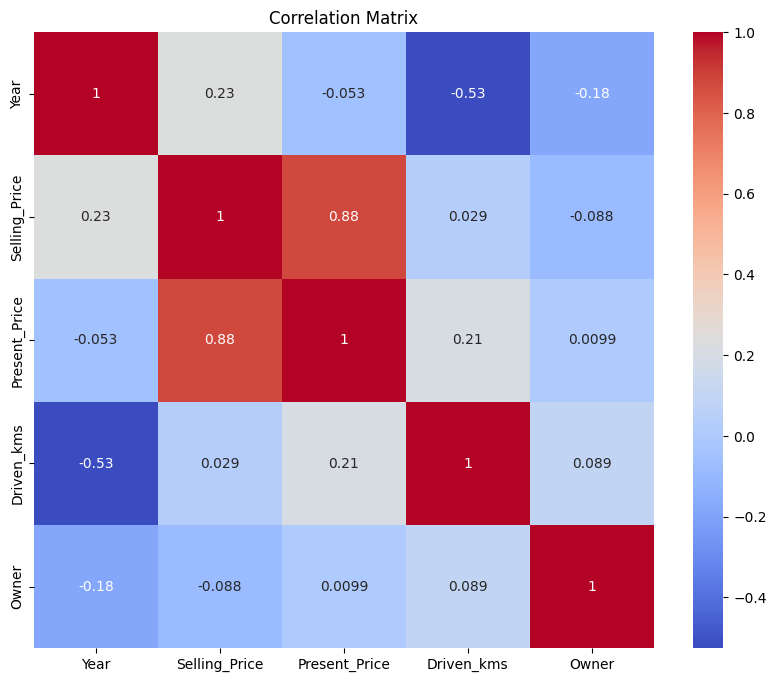

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


In [13]:
numerical_col=[col for col in df.columns if df[col].dtype!='O']
numerical_df=df[numerical_col]
correlation_matrix=numerical_df.corr()
correlation_matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
correlation_matrix

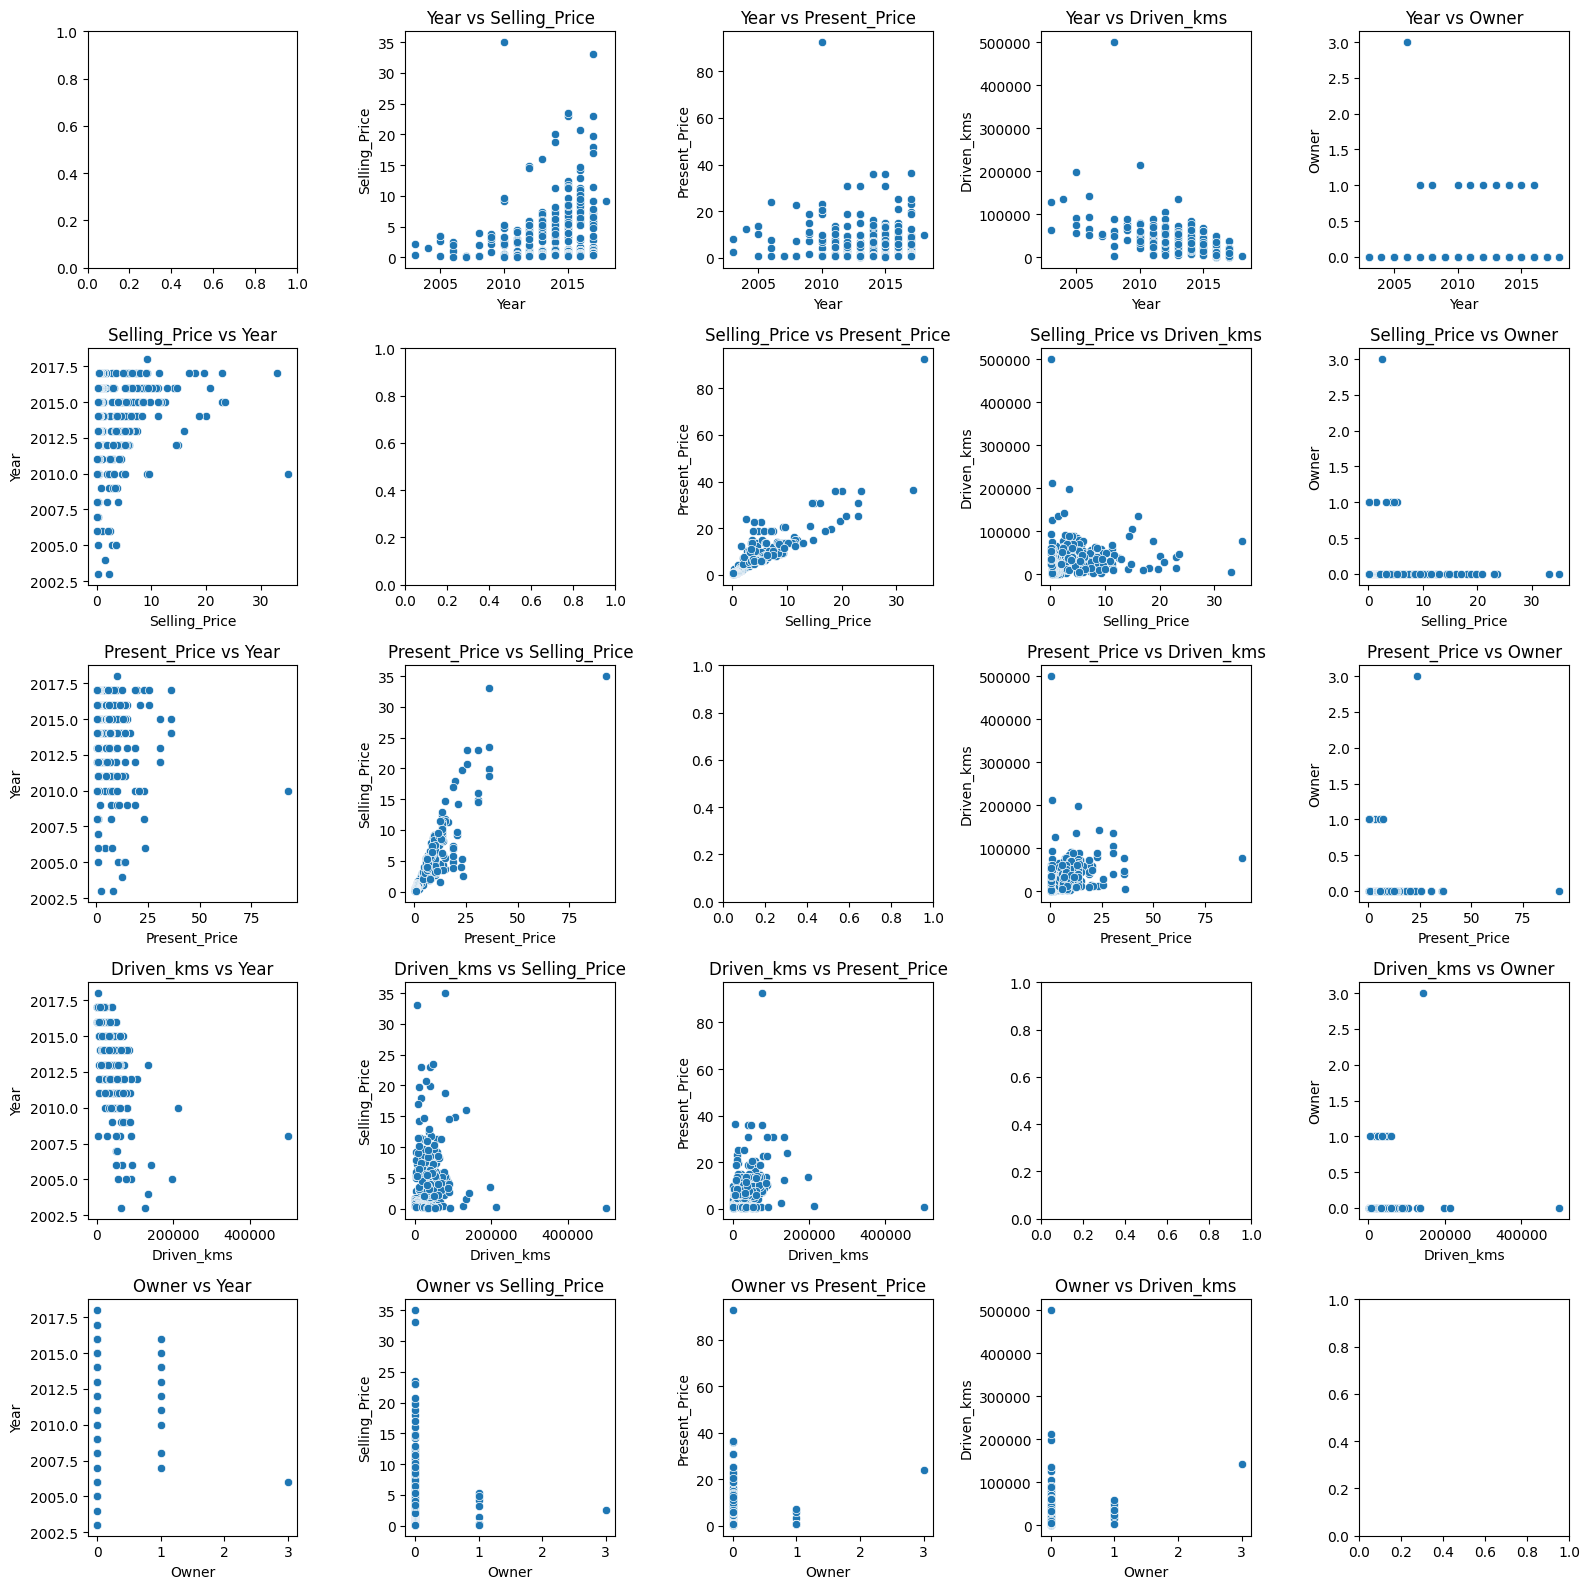

In [14]:
def scatter_plot(df, numerical_col):
    num_cols = len(numerical_col)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_col[i]], y=df[numerical_col[j]])
                axes[i, j].set_title(f'{numerical_col[i]} vs {numerical_col[j]}')
    plt.tight_layout()
    plt.show()

scatter_plot(df, numerical_col)

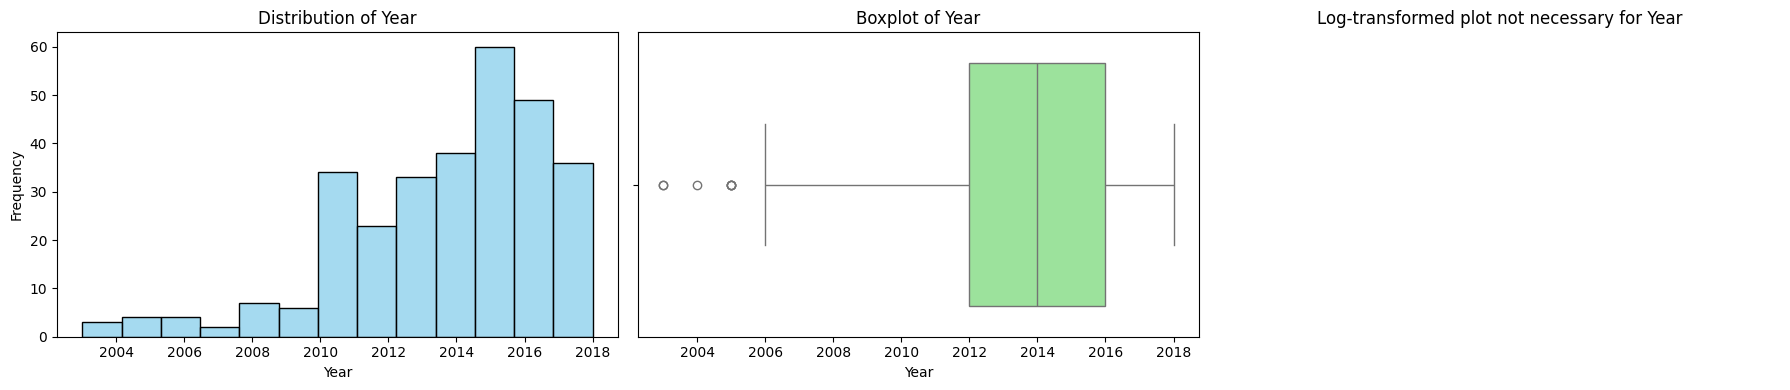

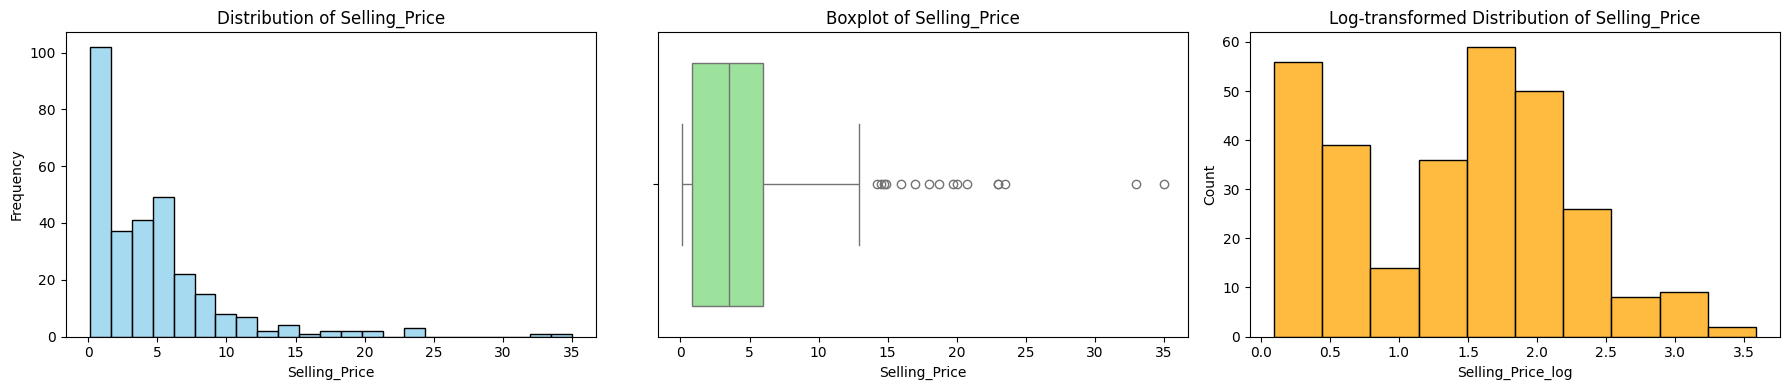

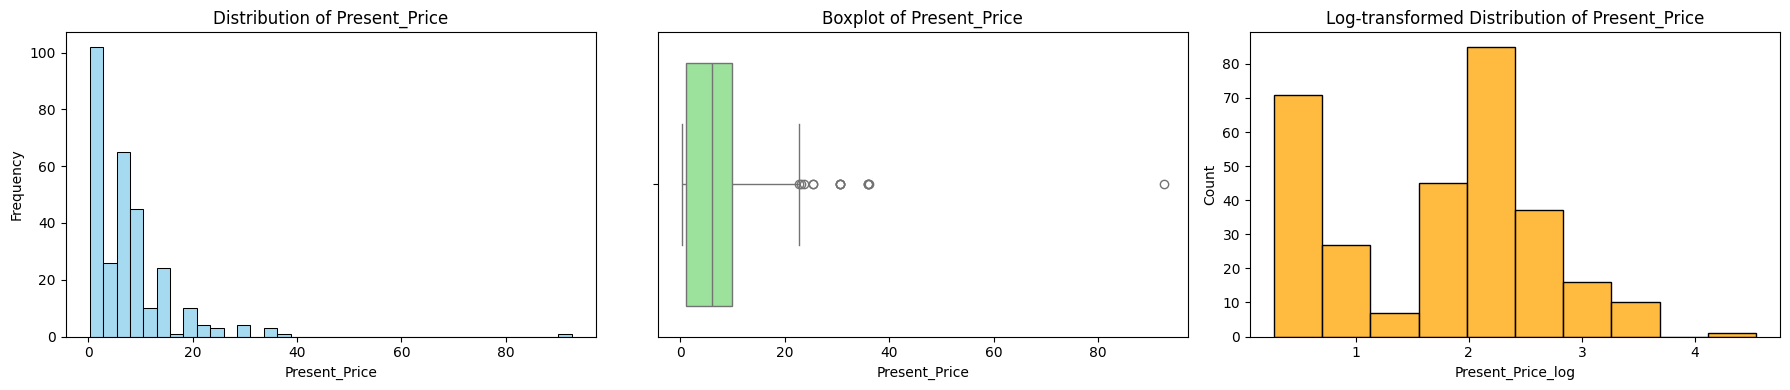

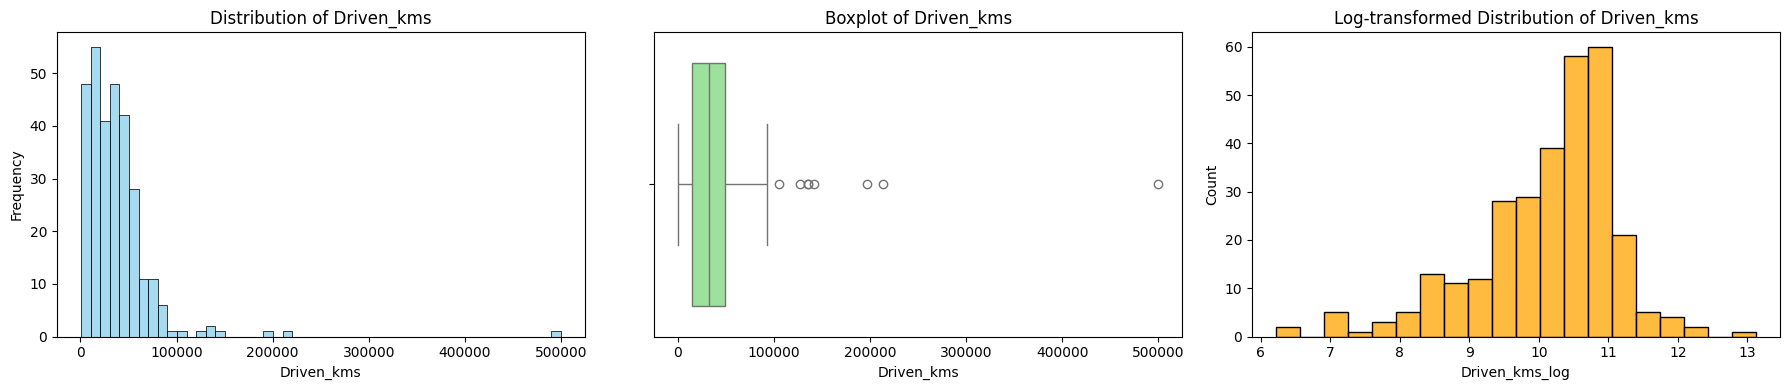

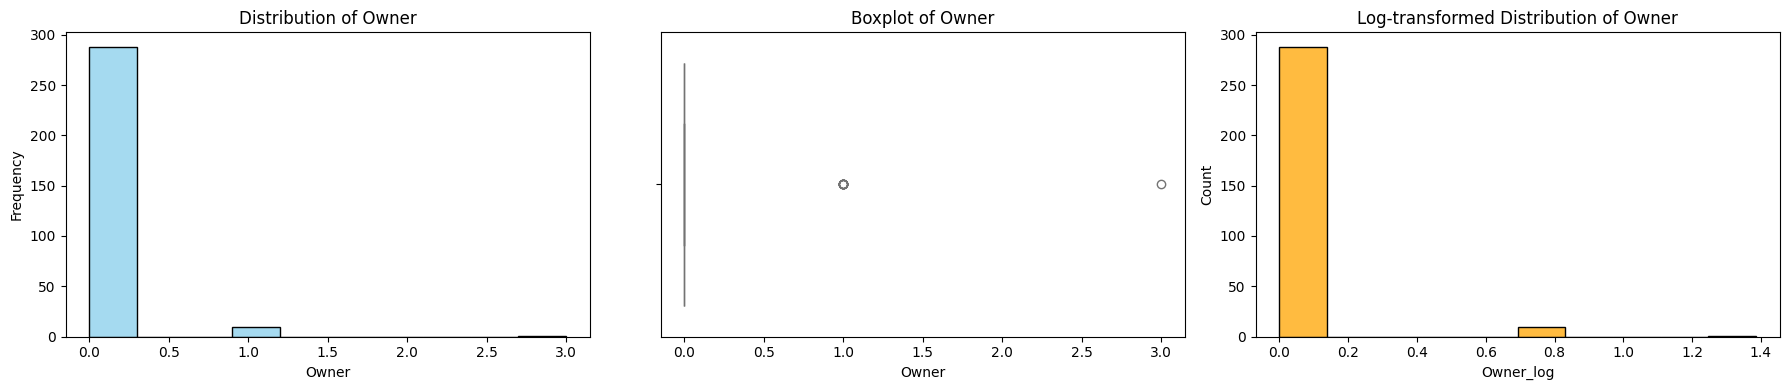

In [15]:
for column in numerical_col:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()

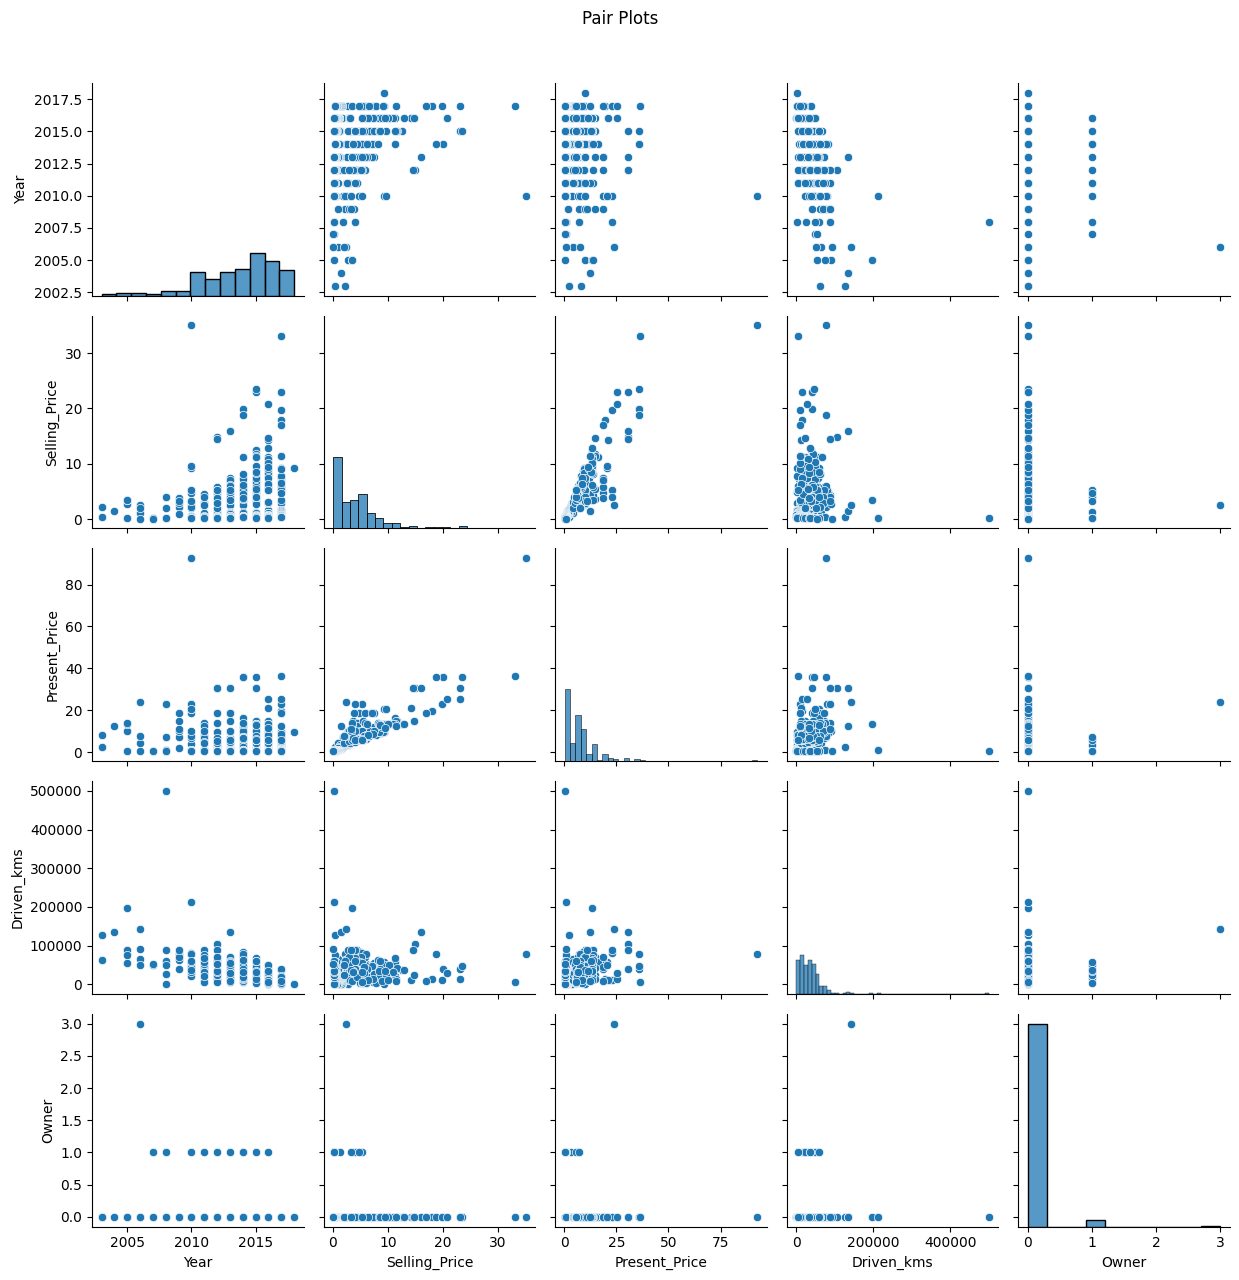

In [16]:
def pair_plots(df, numerical_col):
    pair_plot=sns.pairplot(df[numerical_col])
    pair_plot.fig.suptitle('Pair Plots',y=1.02)
    plt.tight_layout()
    plt.show()

pair_plots(df, numerical_col)

In [17]:

object_cols=df.select_dtypes(include=['object']).columns
df[object_cols]


,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [18]:
for column in object_cols:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")



Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

In [19]:
df1=pd.get_dummies(df,object_cols)

In [20]:
df1

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Car_Name_800,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,...,False,False,False,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,...,False,False,False,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,...,False,False,False,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,...,False,True,False,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,...,False,False,False,False,True,False,True,False,False,True
297,2015,4.00,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,...,False,False,False,False,False,True,True,False,False,True
298,2009,3.35,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,...,False,False,False,False,False,True,True,False,False,True
299,2017,11.50,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,...,False,False,False,False,True,False,True,False,False,True


In [21]:
target=df1['Selling_Price']
target

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [22]:
X=df1.drop(['Selling_Price'],axis=1)
df1['Selling_Price'] = target
df1

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Selling_Price_log,Present_Price_log,Driven_kms_log,Owner_log,Car_Name_800,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,1.470176,1.885553,10.203629,0.0,False,...,False,False,False,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,1.749200,2.355178,10.668979,0.0,False,...,False,False,False,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,2.110213,2.384165,8.839422,0.0,False,...,False,False,False,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,1.348073,1.638997,8.556606,0.0,False,...,False,True,False,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,1.722767,2.063058,10.656106,0.0,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,2.351375,2.533697,10.433792,0.0,False,...,False,False,False,False,True,False,True,False,False,True
297,2015,4.00,5.90,60000,0,1.609438,1.931521,11.002117,0.0,False,...,False,False,False,False,False,True,True,False,False,True
298,2009,3.35,11.00,87934,0,1.470176,2.484907,11.384353,0.0,False,...,False,False,False,False,False,True,True,False,False,True
299,2017,11.50,12.50,9000,0,2.525729,2.602690,9.105091,0.0,False,...,False,False,False,False,True,False,True,False,False,True


Top features based on correlation: ['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Individual', 'Selling_type_Dealer', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Car_Name_fortuner', 'Car_Name_land cruiser', 'Transmission_Automatic', 'Transmission_Manual', 'Car_Name_innova', 'Year', 'Car_Name_city', 'Car_Name_creta', 'Car_Name_corolla altis', 'Driven_kms_log', 'Car_Name_elantra', 'Car_Name_Royal Enfield Classic 350', 'Car_Name_ciaz', 'Car_Name_Bajaj Pulsar 150', 'Owner_log', 'Owner', 'Car_Name_Bajaj Pulsar NS 200', 'Car_Name_TVS Apache RTR 160', 'Car_Name_Yamaha FZ S V 2.0', 'Car_Name_Royal Enfield Thunder 350', 'Car_Name_Honda CB Hornet 160R', 'Car_Name_Bajaj Avenger 220', 'Car_Name_Bajaj Discover 125', 'Car_Name_Honda CB twister', 'Car_Name_Honda CB Shine', 'Car_Name_Activa 3g', 'Car_Name_Honda Karizma', 'Car_Name_Hero Passion Pro', 'Car_Name_Hero Splender iSmart', 'Car_Name_Honda Activa 4G', 'Car_Name_TVS Apache RTR 180', 'Car_Name_verna', 'Car_Name_Bajaj Puls

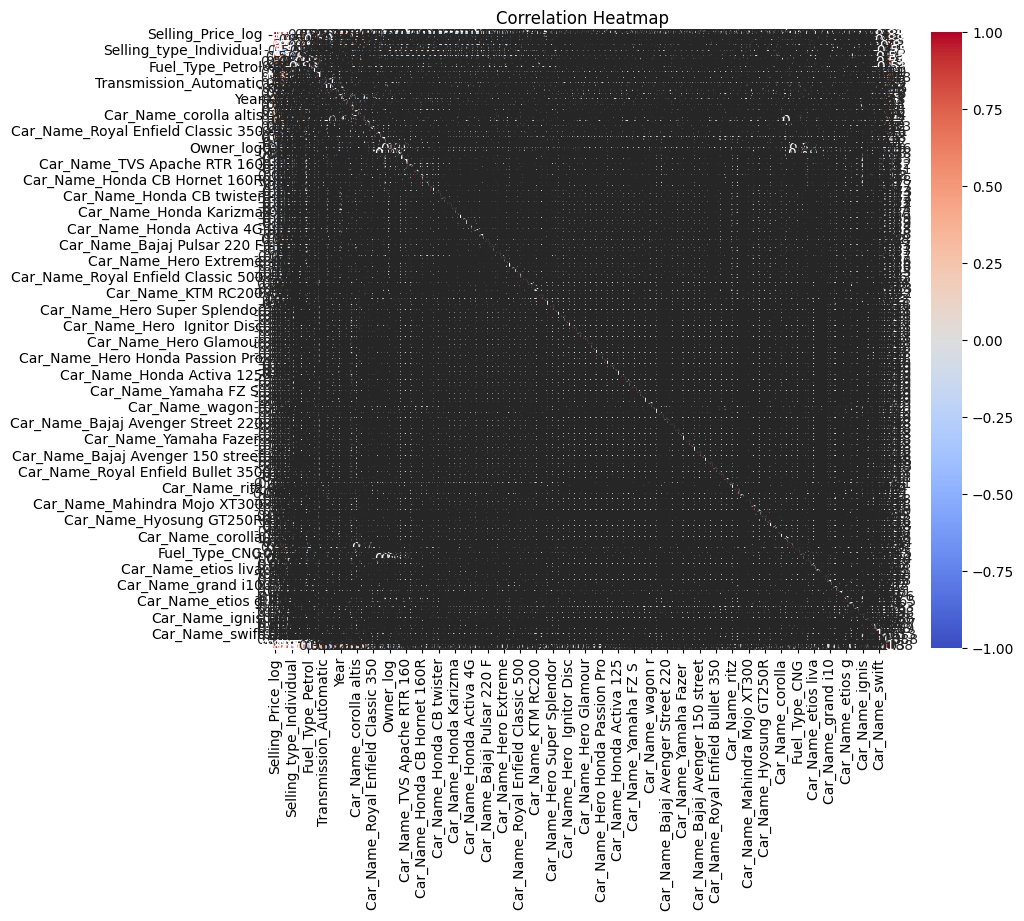

In [23]:
def correlation_analysis(df1, target):
    correlations = df1.corr()[target].drop(target)
    top_features = correlations.abs().sort_values(ascending=False).index.tolist()
    return top_features, correlations

def mutual_information(df1, target):
    X = df1.drop(columns=[target])
    y = df1[target]
    mi = mutual_info_regression(X, y)
    mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
    return mi_series.index.tolist(), mi_series

def lasso_feature_selection(df1, target):
    X = df1.drop(columns=[target])
    y = df1[target]
    lasso = LassoCV(cv=5, random_state=0)
    lasso.fit(X, y)
    coef = pd.Series(lasso.coef_, index=X.columns)
    top_features = coef[coef != 0].index.tolist()
    return top_features, coef

def plot_correlation_heatmap(df1, top_features, target):
    plt.figure(figsize=(10, 8))
    correlation_matrix = df1[top_features + [target]].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()
target = 'Selling_Price'

# Correlation Analysis
top_features_corr, correlations = correlation_analysis(df1, target)
print("Top features based on correlation:", top_features_corr)

# Mutual Information
top_features_mi, mi_series = mutual_information(df1, target)
print("Top features based on mutual information:", top_features_mi)

# Lasso Regression
top_features_lasso, coef = lasso_feature_selection(df1, target)
print("Top features based on Lasso regression:", top_features_lasso)
plot_correlation_heatmap(df1, top_features_corr, target)


In [24]:
print(df1.columns)


Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Selling_Price_log', 'Present_Price_log', 'Driven_kms_log', 'Owner_log',
       'Car_Name_800',
       ...
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Selling_type_Dealer', 'Selling_type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object', length=114)


In [25]:
TopF=['Selling_Price_log', 'Present_Price', 'Present_Price_log', 'Selling_type_Dealer', 'Selling_type_Individual', 'Year', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Driven_kms_log', 'Transmission_Manual', 'Transmission_Automatic', 'Owner', 'Fuel_Type_CNG', 'Owner_log']
x=df1[TopF]
x

,Selling_Price_log,Present_Price,Present_Price_log,Selling_type_Dealer,Selling_type_Individual,Year,Driven_kms,Fuel_Type_Diesel,Fuel_Type_Petrol,Driven_kms_log,Transmission_Manual,Transmission_Automatic,Owner,Fuel_Type_CNG,Owner_log
0,1.470176,5.59,1.885553,True,False,2014,27000,False,True,10.203629,True,False,0,False,0.0
1,1.749200,9.54,2.355178,True,False,2013,43000,True,False,10.668979,True,False,0,False,0.0
2,2.110213,9.85,2.384165,True,False,2017,6900,False,True,8.839422,True,False,0,False,0.0
3,1.348073,4.15,1.638997,True,False,2011,5200,False,True,8.556606,True,False,0,False,0.0
4,1.722767,6.87,2.063058,True,False,2014,42450,True,False,10.656106,True,False,0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2.351375,11.60,2.533697,True,False,2016,33988,True,False,10.433792,True,False,0,False,0.0
297,1.609438,5.90,1.931521,True,False,2015,60000,False,True,11.002117,True,False,0,False,0.0
298,1.470176,11.00,2.484907,True,False,2009,87934,False,True,11.384353,True,False,0,False,0.0
299,2.525729,12.50,2.602690,True,False,2017,9000,True,False,9.105091,True,False,0,False,0.0


In [26]:
def remove_redundant_features(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle_matrix.columns if any(upper_triangle_matrix[column] > threshold)]
    df_reduced = df.drop(columns=to_drop)

    return df_reduced, to_drop
threshold = 0.9
x, dropped_features = remove_redundant_features(x, threshold)

print("Dropped Features:", dropped_features)
print("Reduced DataFrame shape:", x.shape)

Dropped Features: ['Present_Price_log', 'Selling_type_Individual', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Owner_log']
Reduced DataFrame shape: (299, 10)


In [27]:
x

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
0,1.470176,5.59,True,2014,27000,False,10.203629,True,0,False
1,1.749200,9.54,True,2013,43000,True,10.668979,True,0,False
2,2.110213,9.85,True,2017,6900,False,8.839422,True,0,False
3,1.348073,4.15,True,2011,5200,False,8.556606,True,0,False
4,1.722767,6.87,True,2014,42450,True,10.656106,True,0,False
...,...,...,...,...,...,...,...,...,...,...
296,2.351375,11.60,True,2016,33988,True,10.433792,True,0,False
297,1.609438,5.90,True,2015,60000,False,11.002117,True,0,False
298,1.470176,11.00,True,2009,87934,False,11.384353,True,0,False
299,2.525729,12.50,True,2017,9000,True,9.105091,True,0,False


In [28]:
X = x.drop(['Selling_Price_log', 'Present_Price','Selling_type_Dealer', 'Driven_kms_log','Owner', 'Fuel_Type_CNG'],axis=1)
X

,Year,Driven_kms,Fuel_Type_Diesel,Transmission_Manual
0,2014,27000,False,True
1,2013,43000,True,True
2,2017,6900,False,True
3,2011,5200,False,True
4,2014,42450,True,True
...,...,...,...,...
296,2016,33988,True,True
297,2015,60000,False,True
298,2009,87934,False,True
299,2017,9000,True,True


In [29]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['Year', 'Driven_kms']
scaler = MinMaxScaler()
X[non_boolean_numerical_features] = scaler.fit_transform(X[non_boolean_numerical_features])

In [30]:
X

,Year,Driven_kms,Fuel_Type_Diesel,Transmission_Manual
0,0.733333,0.053053,False,True
1,0.666667,0.085085,True,True
2,0.933333,0.012813,False,True
3,0.533333,0.009409,False,True
4,0.733333,0.083984,True,True
...,...,...,...,...
296,0.866667,0.067043,True,True
297,0.800000,0.119119,False,True
298,0.400000,0.175043,False,True
299,0.933333,0.017017,True,True


In [31]:
y=df[target]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
X_train

,Selling_Price_log,Present_Price,Selling_type_Dealer,Year,Driven_kms,Fuel_Type_Diesel,Driven_kms_log,Transmission_Manual,Owner,Fuel_Type_CNG
6,2.047693,8.12,True,2015,18796,False,9.841453,True,0,False
185,0.223144,0.58,False,2008,1900,False,7.550135,False,0,False
187,0.223144,0.51,False,2013,32000,False,10.373522,True,0,False
148,0.418710,0.94,False,2010,45000,False,10.714440,True,0,False
31,1.208960,4.89,True,2011,54200,False,10.900455,True,0,False
...,...,...,...,...,...,...,...,...,...,...
190,0.182322,0.75,False,2008,60000,False,11.002117,True,0,False
72,2.134166,18.61,True,2013,56001,False,10.933143,True,0,False
108,0.788457,1.50,False,2016,18000,False,9.798183,True,0,False
272,2.140066,10.00,True,2015,27600,False,10.225607,True,0,False


In [34]:
y_train

6      6.75
185    0.25
187    0.25
148    0.52
31     2.35
       ... 
190    0.20
72     7.45
108    1.20
272    7.50
104    1.35
Name: Selling_Price, Length: 239, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)
y_pred_train
y_pred_test

array([ 8.721451  ,  8.37885316, -0.23696252,  7.56165514,  9.6852542 ,
        5.07381808,  8.1298049 ,  2.11095578,  8.7676064 , -0.88120034,
       11.24569969, -1.28270211,  0.17941446,  0.32568838,  5.12943452,
        4.82461096,  0.42668328,  2.24061816, 22.20296365,  0.54997833,
        0.25527715,  3.84058153,  5.59048825, -1.25311767,  6.096135  ,
        9.43928767,  9.00852402,  1.91697858,  5.1331024 ,  5.15611134,
        2.96664576,  5.83630609,  6.10472395,  2.6322008 ,  1.89261092,
        7.05194391,  1.98133565, -7.2654048 ,  1.98843718,  8.45833047,
        6.91431181, 10.84820041,  1.78870619,  1.76097241,  0.99714551,
       -1.81991773, 10.08312814,  4.58247698,  5.59007896, -0.95878349,
        0.4050184 , -0.65226214, 11.85922564, 11.09618054,  7.54006067,
        5.44700024,  3.81072522,  3.75859138, 10.89980258,  9.21786798])

In [37]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 1.193066278945372
Testing MSE: 5.963396518445632
Training R2 Score: 0.9513131484019374
Testing R2 Score: 0.7686208107057604


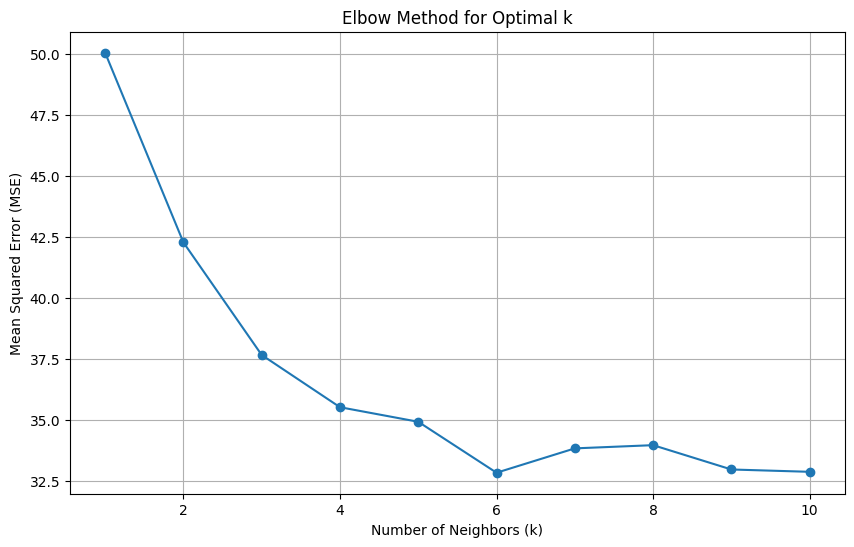

In [38]:
mse_values = []
r2_values = []
max_neighbors = 10
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [39]:
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 6


In [40]:
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [41]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 17.75086191306369
Testing MSE: 32.838061759259254
Training R2 Score: 0.27561980842926304
Testing R2 Score: -0.2741135164079316


In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [43]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [44]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.019918479776847978
Testing MSE: 1.6885651851851844
Training R2 Score: 0.9991871632900298
Testing R2 Score: 0.9344838394679712


In [45]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(max_depth=5)

In [47]:
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.10344258151689052
Testing MSE: 1.1344682640901043
Training R2 Score: 0.9957786975425328
Testing R2 Score: 0.9559827446635007


In [48]:
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
xgb_regressor = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 3.138388740837397e-06
Testing MSE: 1.5567941836277905
Training R2 Score: 0.9999998719280986
Testing R2 Score: 0.9395965411671677


In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,1.193066e+00,5.963397,0.951313,0.768621
1,Decision Tree,1.095927e-34,1.570915,1.000000,0.939049
2,Random Forest,6.810271e-02,0.934459,0.997221,0.963743
3,XGBoost,2.055078e-06,1.564247,1.000000,0.939307


from matplotlib import pyplot as plt
results_df['Training MSE'].plot(kind='hist', bins=20, title='Training MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Testing MSE'].plot(kind='hist', bins=20, title='Testing MSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Training R2 Score'].plot(kind='hist', bins=20, title='Training R2 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Testing R2 Score'].plot(kind='hist', bins=20, title='Testing R2 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Training MSE', y='Testing MSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Testing MSE', y='Training R2 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Training R2 Score', y='Testing R2 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Training MSE'].plot(kind='line', figsize=(8, 4), title='Training MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Testing MSE'].plot(kind='line', figsize=(8, 4), title='Testing MSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Training R2 Score'].plot(kind='line', figsize=(8, 4), title='Training R2 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Testing R2 Score'].plot(kind='line', figsize=(8, 4), title='Testing R2 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Training MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Testing MSE', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Training R2 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(results_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(results_df, x='Testing R2 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [52]:
import pandas as pd
import xgboost as xgb

In [53]:
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import pandas as pd
import xgboost as xgb

# Load the dataset
df = pd.read_csv('your_data.csv')

# Pre-process your data (e.g., handle missing values, etc.)

# Split the data into training and testing sets
X_train = df.drop('price', axis=1)
y_train = df['price']
X_test = df.drop('price', axis=1)
y_test = df['price']

# Train the XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
model.fit(X_train, y_train)

# Get user input for features
features = {}
for column in X_train.columns:
    features[column] = float(input(f'Enter the value for {column}: '))

# Make a prediction
predicted_price = model.predict([features])

# Print the predicted price
print(f'Predicted price: {predicted_price[0]}')